# Data Science Programming Assignment - 2

This Assignment focuses on data preprocessing and model building. Load the "adult" dataset. Predict the "gender" of the individuals using a logistic regression model. Make a stratified 80-20 split based on "relationship" to ensure there are no biases in the dataset. Calculate the accuracy, root mean squared error,confusion matrix, cross validation score, precision, recall, ROC Curve for you model. Provide your intepretations based on these metrics.

Import libraries

In [117]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Load the dataset

In [2]:
adults=pd.read_csv('adult.csv',sep=' *, *',engine='python',names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","gender","capital-gain","capital-loss","hours-per-week","native-country","salary"])
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Make the train and test split. Use random seed = 42

In [102]:
adultsdf=adults[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary', 'gender']]
X=adultsdf[adultsdf.columns[0:14]]
y = adults["gender"]
z=adults["relationship"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=z)
X_test




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary
14525,32,Local-gov,206609,HS-grad,9,Never-married,Other-service,Own-child,White,0,0,40,United-States,<=50K
9269,36,Private,95336,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,0,0,45,United-States,>50K
25796,46,Private,456062,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,2415,55,United-States,>50K
13689,40,Private,207025,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,6849,0,38,United-States,<=50K
24259,61,Private,204908,9th,5,Married-civ-spouse,Craft-repair,Husband,White,0,0,40,United-States,<=50K
27872,36,Private,169426,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,7298,0,40,United-States,>50K
2522,46,Private,133169,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,0,0,40,United-States,<=50K
25655,39,Private,114591,Some-college,10,Separated,Prof-specialty,Unmarried,White,0,0,40,United-States,<=50K
32256,41,Private,182108,Doctorate,16,Never-married,Machine-op-inspct,Not-in-family,White,0,0,40,United-States,>50K
15162,43,Private,118001,7th-8th,4,Separated,Farming-fishing,Not-in-family,Black,0,0,40,United-States,<=50K


Drop the columns with null values in train and test datasets.

In [140]:
null_data=X_train.isnull().sum()
print(null_data)
null1_data=X_test.isnull().sum()
null1_data
#We can see that X_train and X-test has null values in workclass, occupation and native-country
null2_data=y_train.isnull().sum()
null2_data
null3_data=y_test.isnull().sum()
null3_data
#y_train and y_test has no null values
#Will drop 3 columns from X_train and X_test
X_traindrop = X_train.drop(columns=['workclass','occupation','native-country'])
X_testdrop = X_test.drop(columns=['workclass','occupation','native-country'])
#Missing values columns dropped

age                  0
workclass         1475
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1480
relationship         0
race                 0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     472
salary               0
dtype: int64


In [9]:
X_train.shape,X_traindrop.shape,X_test.shape,X_testdrop.shape

((26048, 14), (26048, 11), (6513, 14), (6513, 11))

Define Independent and Target variable (i.e. create train/test datasets appropriately)

In [ ]:
#Done above I have already created train test datasets with x and y variables.

In [133]:
#get_dummies is a type of One hot Encoding method..source: https://www.datacamp.com/community/tutorials/categorical-data
#LabelBinarizer also converts them to dummy variables under One Hot Encoding
X_traindropfin = X_traindrop.select_dtypes(include=[np.object])
X_testdropfin=X_testdrop.select_dtypes(include=[np.object])

X_traindrop1=pd.get_dummies(X_traindropfin)
print(X_traindrop1.as_matrix())

X_testdrop1=pd.get_dummies(X_testdropfin)
X_testdrop1.head()
X_traindrop1.as_matrix().shape

encoder = LabelBinarizer()
y_train_1=encoder.fit_transform(y_train)
type(y_train_1)

y_test_1=encoder.fit_transform(y_test)
type(y_test_1)

[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 1]]


C:\Users\Arpita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Arpita\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


numpy.ndarray

Scale Numerical Variables. Use "Standard Scaler".


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#scaler = StandardScaler()
X_traindrop2 = X_traindrop.select_dtypes(include=[np.number])
print(X_traindrop2.head())

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_traindrop2_Scalar = num_pipeline.fit_transform(X_traindrop2)
print(X_traindrop2_Scalar)

X_testdrop2 = X_testdrop.select_dtypes(include=[np.number])
print(X_traindrop2.head())

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_testdrop2_Scalar = num_pipeline.fit_transform(X_testdrop2)


       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
8037    51  243361             10             0             0              45
6866    19  235849              9             0             0              35
23816   42   76487              9             0             0              45
14806   48  345831              9             0             0              40
22205   38  201454             10             0             0              40
[[ 0.91223843  0.5037837  -0.03553107 -0.14606722 -0.21584405  0.36995529]
 [-1.43293795  0.43301798 -0.42587833 -0.14606722 -0.21584405 -0.4373867 ]
 [ 0.25265758 -1.06822885 -0.42587833 -0.14606722 -0.21584405  0.36995529]
 ...
 [ 0.83895167 -0.16985657  1.13551072 -0.14606722 -0.21584405 -0.0337157 ]
 [-1.43293795  0.76526453 -0.42587833 -0.14606722 -0.21584405 -1.00252609]
 [ 0.9855252  -0.40983072 -0.42587833 -0.14606722 -0.21584405 -0.0337157 ]]
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-wee

C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Recreate the dataframe from your encoded scaled values and build a logistic regression model to predict the "sex/gender".

In [137]:
X_train_scaled=np.concatenate((X_traindrop1.as_matrix(), X_traindrop2_Scalar),axis=1)
X_train_final=pd.DataFrame(X_train_scaled) #To convert array to dataframe
X_test_scaled=np.concatenate((X_testdrop1.as_matrix(),X_testdrop2_Scalar),axis=1)
X_test_final=pd.DataFrame(X_test_scaled) #To convert array to dataframe
print(X_train_final)
log_reg = LogisticRegression()
log_reg.fit(X_train_final,y_train_1)

C:\Users\Arpita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Arpita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


        0    1    2    3    4    5    6    7    8    9     ...      32   33  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
7      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    ...     0.0  1.0   
8      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0    ...     0.0  0.0   
9      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    ...     0.0  1.0   
10     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    ...     0.0  0.0   
11     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Calculate all the metrics noted above in this notebook (accuracy, confusion matrix etc. - see above)

In [138]:
y_pred = log_reg.predict(X_test_final)
#Calculating accuracy
accuracy = accuracy_score(y_test_1, y_pred)
print(accuracy)
#Calculting root mean square error
rmse = mean_squared_error(y_test_1, y_pred)
print(rmse)
#Calculating confusion_matrix
confusion = confusion_matrix(y_test_1, y_pred)
print(confusion)
#Calculating cross validation score
crossval = cross_val_score(log_reg, X_train_final, y_train_1, cv=8)
cross_score = crossval.mean()
print(cross_score)
#calculating precision
precision = precision_score(y_test_1, y_pred)
#calculating recall
recall = recall_score(y_test_1, y_pred)
#calculating f-1
f1 = f1_score(y_test_1, y_pred)
print(precision, recall, f1)
#calculating auc
roc = roc_auc_score(y_test_1, y_pred)
print(roc)

0.7979425763856901
0.20205742361430984
[[1402  783]
 [ 533 3795]]


C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\li

0.8053982367082502
0.8289646133682831 0.8768484288354899 0.852234448686279
0.7592480130447472


In [99]:
#Interpretations:
#Accuracy: almost 79%
#1402 are the number of true negatives 3795 are the number of true positives.
#The mean of 8-fold cross validation came to 80.53% which is slightly higher than the model accuracy.
#The AUC comes around 0.759 which I think is a sign of a good classifier.

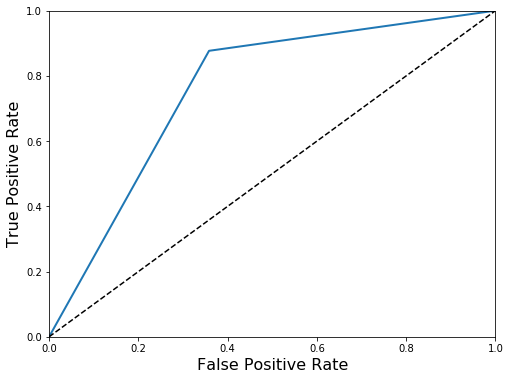

In [139]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()